## <font color='purple'> **Testing CIFAR-10 trained models** 

In [12]:
import os 

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [3]:
### import archetecture of models 

from models.vgg_models import * 

## you can test followings as well: 
# from models.resnet_models import * 
# from models.densenet_models import * 
# from models.mobilenet_models import * 
# from models.mobilenetV2_models import * 
# from models.googlenet_models import *  
# ...

In [5]:
## getting the archetecture of model from models.vgg_models 
vgg19_model = VGG('VGG19')

## you can test followings as well:  
# vgg11_model = VGG('VGG11')
# vgg16_model = VGG('VGG16')
# resnet18_model = ResNet18()
# resnet50_model = ResNet50() 
# densenet121_model = DenseNet121() 
# mobilenet_model = MobileNet()
# mobilenetV2_model = MobileNetV2() 
# googlenet_model = GoogleNet() 
# ... 


In [6]:
## layers of model 
vgg19_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [10]:
## your directory of trained models  
trained_models_directory = "gdrive/MyDrive/models/" 
model_file_name = "vgg19_cifar10.pth" 
device_name = 'cuda:0'

path = os.path.join(trained_models_directory, model_file_name) 

## load the model 
## map location, we trained models in different GPU (e.g. cuda:1, cuda:2), for that reason you should map your gpu before using  
vgg19_model.load_state_dict(torch.load(path, map_location=device_name)['net'])

## model in evaluation mode 
vgg19_model.eval()

## state of the models are saved as follow: 
# state = {
#          'net': net.state_dict(),
#          'acc': acc,
#          'epoch': epoch,
#         }

print ("Model is loadded!")

Model is loadded!


In [11]:
## you can get accuracy of the model on test 
torch.load(path, map_location='cuda:0')['acc']

91.23

### <font color='green'> ***Testing the model*** 

In [14]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [27]:
### loading test image
image_dir = 'example_images' 
image_name = 'airplane_ex1.png'

image_path = os.path.join(image_dir, image_name)

input_image = Image.open(image_path) 
input_tensor = transform_test(input_image)
input_batch = input_tensor.unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


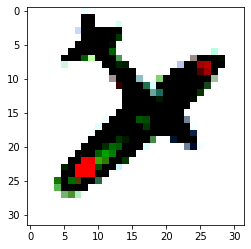

In [28]:
### printing image 
input = input_batch[0].numpy().astype(np.float32).transpose((1,2,0))

plt.imshow(input)

In [29]:
## Softmax for getting probability 

def softmax_activation(inputs): 
  inputs = inputs.tolist()
  exp_values = np.exp(inputs - np.max(inputs)) 
  # Normalize 
  probabilities = exp_values / np.sum(exp_values)

  return probabilities

In [30]:
predection = vgg19_model(input_batch)

probability = np.max(softmax_activation(predection), axis=1)[0]
probability = round(probability*100, 2) 

label = np.argmax(predection.detach().numpy(), axis=1) 

print("Predicted label: {}, confidence: {}%".format(label, probability))

Predicted label: [0], confidence: 100.0%


#### Labels 

* Airplane: [0]
* Automobile: [1] 
* Bird:       [2] 
* Cat:        [3]
* Deer: [4]
* Dog: [5] 
* Frog: [6]
* Horse: [7] 
* Ship: [8]
* Truck [9]